# Decision Trees

In [6]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
# import dataset
df = sns.load_dataset("diamonds")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
# Select features and targets
X = df[["carat", "cut", "color", "clarity"]]
y = df["price"]

In [9]:
# encode X using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["cut"] = le.fit_transform(X["cut"])
X["color"] = le.fit_transform(X["color"])
X["clarity"] = le.fit_transform(X["clarity"])

# split the dataset into train and testing data with 80% of the train size and 20% of the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/nf/j0gr9tfn3gg2ln2c25rl4wnc0000gn/T/ipykernel_21937/1870515642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cut"] = le.fit_transform(X["cut"])
/var/folders/nf/j0gr9tfn3gg2ln2c25rl4wnc0000gn/T/ipykernel_21937/1870515642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["color"] = le.fit_transform(X["color"])
/var/folders/nf/j0gr9tfn3gg2ln2c25rl4wnc0000gn/T/ipykernel_21937/1870515642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [10]:
# create the model
model = DecisionTreeRegressor()

# train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
# we will evaluate the model 
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.9919335346663382
Test score: 0.9724778000249301


**Above is your assignment to check the difference between training and testing score**

In [13]:
# calculate the evaluation metrics in above mentioned DT regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 score: {r2_score(y_test, y_pred)}")

Mean absolute error: 319.21847751046704
Mean squared error: 437515.49894954736
Root mean squared error: 661.449543766981
R2 score: 0.9724778000249301


# Classfication

In [14]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
# split  dataset
X = df.drop("cut", axis=1)
y = df["cut"]

# label encode X
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["color"] = le.fit_transform(X["color"])
X["clarity"] = le.fit_transform(X["clarity"])


# train test split the data by 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = DecisionTreeClassifier()

# train the model
model.fit(X_train, y_train)

# evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

# evaluate the accuracy score, precision score, recall score, f1 score, confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred, average='micro')}")
print(f"Recall score: {recall_score(y_test, y_pred, average='micro')}")
print(f"F1 score: {f1_score(y_test, y_pred, average='micro')}")

Train score: 0.9999304783092324
Test score: 0.7162588060808306
Accuracy score: 0.7162588060808306
Precision score: 0.7162588060808306
Recall score: 0.7162588060808306
F1 score: 0.7162588060808306


# plot the Decision tree

[Text(0.6219330717177078, 0.9893617021276596, 'x[4] <= 57.05\ngini = 0.715\nsamples = 43152\nvalue = [1275, 3902, 17259, 11016, 9700]'),
 Text(0.3658415045373265, 0.9680851063829787, 'x[3] <= 63.05\ngini = 0.493\nsamples = 23767\nvalue = [505, 1517, 16284, 1348, 4113]'),
 Text(0.238446847356736, 0.9468085106382979, 'x[3] <= 62.75\ngini = 0.355\nsamples = 20602\nvalue = [24, 111, 16234, 1348, 2885]'),
 Text(0.06687508387579609, 0.925531914893617, 'x[3] <= 60.05\ngini = 0.319\nsamples = 19191\nvalue = [22, 96, 15626, 1189, 2258]'),
 Text(0.0047233503391287505, 0.9042553191489362, 'x[3] <= 58.45\ngini = 0.682\nsamples = 679\nvalue = [12, 44, 262, 107, 254]'),
 Text(0.0018598793221045254, 0.8829787234042553, 'x[3] <= 58.1\ngini = 0.646\nsamples = 47\nvalue = [9, 25, 1, 7, 5]'),
 Text(0.00094570135022264, 0.8617021276595744, 'x[3] <= 55.25\ngini = 0.472\nsamples = 31\nvalue = [8, 21, 1, 0, 1]'),
 Text(0.0006935143234966027, 0.8404255319148937, 'x[6] <= 6.42\ngini = 0.444\nsamples = 3\nvalue

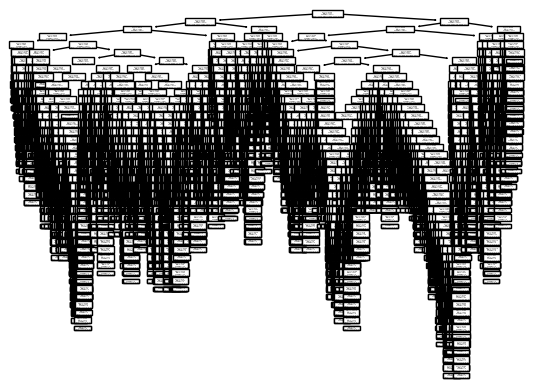

In [23]:
# plot the trained secision tree model
from sklearn.tree import plot_tree
plot_tree(model)

In [25]:
# Export your model as dot file
from sklearn import tree
fn = X.columns
cn = le.classes_
tree.export_graphviz(model,
                     out_file="decisiontree1.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)